In [1]:
import pandas as pd

In [2]:
df1=pd.read_csv("Customer Segmentation.csv")

In [3]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8068 entries, 0 to 8067
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               8068 non-null   int64  
 1   Gender           8068 non-null   object 
 2   Ever_Married     7928 non-null   object 
 3   Age              8068 non-null   int64  
 4   Graduated        7990 non-null   object 
 5   Profession       7944 non-null   object 
 6   Work_Experience  7239 non-null   float64
 7   Spending_Score   8068 non-null   object 
 8   Family_Size      7733 non-null   float64
 9   Var_1            7992 non-null   object 
 10  Segmentation     8068 non-null   object 
dtypes: float64(2), int64(2), object(7)
memory usage: 693.5+ KB


In [4]:
df1.head()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D
1,462643,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,Cat_4,A
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,B
3,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,B
4,462669,Female,Yes,40,Yes,Entertainment,NaN,High,6.0,Cat_6,A


In [5]:
df1.isnull().sum()

ID                   0
Gender               0
Ever_Married       140
Age                  0
Graduated           78
Profession         124
Work_Experience    829
Spending_Score       0
Family_Size        335
Var_1               76
Segmentation         0
dtype: int64

In [6]:
df1.describe()

,ID,Age,Work_Experience,Family_Size
count,8068.000000,8068.000000,7239.000000,7733.000000
mean,463479.214551,43.466906,2.641663,2.850123
std,2595.381232,16.711696,3.406763,1.531413
min,458982.000000,18.000000,0.000000,1.000000
25%,461240.750000,30.000000,0.000000,2.000000
50%,463472.500000,40.000000,1.000000,3.000000
75%,465744.250000,53.000000,4.000000,4.000000
max,467974.000000,89.000000,14.000000,9.000000


## data preprocessing

### id

In [7]:
df1["ID"].value_counts()

ID
462809    1
466223    1
464086    1
460372    1
460401    1
         ..
467040    1
462053    1
459872    1
465098    1
461879    1
Name: count, Length: 8068, dtype: int64

### Gender

In [8]:
df1["Gender"].value_counts()

Gender
Male      4417
Female    3651
Name: count, dtype: int64

In [9]:
df1["Gender"]=df1["Gender"].replace({"Male":0, "Female":1})

In [10]:
df1["Gender"].value_counts()

Gender
0    4417
1    3651
Name: count, dtype: int64

### Ever_Married

In [11]:
df1["Ever_Married"].value_counts()

Ever_Married
Yes    4643
No     3285
Name: count, dtype: int64

In [12]:
df1["Ever_Married"].isnull().sum()

140

In [13]:
df1["Ever_Married"]=df1["Ever_Married"].replace({"No":0, "Yes":1})

In [14]:
df1["Ever_Married"].value_counts()

Ever_Married
1.0    4643
0.0    3285
Name: count, dtype: int64

In [15]:
df1["Ever_Married"].isnull().sum()

140

In [16]:
df1["Ever_Married"].info()

<class 'pandas.core.series.Series'>
RangeIndex: 8068 entries, 0 to 8067
Series name: Ever_Married
Non-Null Count  Dtype  
--------------  -----  
7928 non-null   float64
dtypes: float64(1)
memory usage: 63.2 KB


In [17]:
df1["Ever_Married"].describe()

count    7928.000000
mean        0.585646
std         0.492641
min         0.000000
25%         0.000000
50%         1.000000
75%         1.000000
max         1.000000
Name: Ever_Married, dtype: float64

In [18]:
df1["Ever_Married"]=df1["Ever_Married"].fillna(1)

In [19]:
df1["Ever_Married"].isna().sum()

0

### Age

In [20]:
df1["Age"].info()

<class 'pandas.core.series.Series'>
RangeIndex: 8068 entries, 0 to 8067
Series name: Age
Non-Null Count  Dtype
--------------  -----
8068 non-null   int64
dtypes: int64(1)
memory usage: 63.2 KB


In [21]:
df1["Age"].value_counts()

Age
35    250
37    234
33    232
42    232
40    229
     ... 
78     29
87     28
76     27
80     24
85     22
Name: count, Length: 67, dtype: int64

In [22]:
df1["Age"].isnull().sum()

0

### Graduated

In [23]:
df1["Graduated"].value_counts()

Graduated
Yes    4968
No     3022
Name: count, dtype: int64

In [24]:
df1["Graduated"].isnull().sum()

78

In [25]:
df1["Graduated"]=df1["Graduated"].replace({"No":0, "Yes":1})

In [26]:
df1["Graduated"].value_counts()

Graduated
1.0    4968
0.0    3022
Name: count, dtype: int64

In [27]:
df1["Graduated"].describe()

count    7990.000000
mean        0.621777
std         0.484974
min         0.000000
25%         0.000000
50%         1.000000
75%         1.000000
max         1.000000
Name: Graduated, dtype: float64

In [28]:
df1["Graduated"]=df1["Graduated"].fillna(1)

In [29]:
df1["Graduated"].isnull().sum()

0

### Profession

In [30]:
df1["Profession"].value_counts()

Profession
Artist           2516
Healthcare       1332
Entertainment     949
Engineer          699
Doctor            688
Lawyer            623
Executive         599
Marketing         292
Homemaker         246
Name: count, dtype: int64

In [31]:
df1["Profession"].isnull().sum()

124

In [32]:
df1["Profession"]=df1["Profession"].fillna("Not Available")

In [33]:
df1["Profession"].value_counts()

Profession
Artist           2516
Healthcare       1332
Entertainment     949
Engineer          699
Doctor            688
Lawyer            623
Executive         599
Marketing         292
Homemaker         246
Not Available     124
Name: count, dtype: int64

In [34]:
df1["Profession"].unique()

array(['Healthcare', 'Engineer', 'Lawyer', 'Entertainment', 'Artist',
       'Executive', 'Doctor', 'Homemaker', 'Marketing', 'Not Available'],
      dtype=object)

In [35]:
dict={'Healthcare':1, 'Engineer':2, 'Lawyer':3, 'Entertainment':4, 'Artist':5,
       'Executive':6, 'Doctor':7, 'Homemaker':8, 'Marketing':9, 'Not Available':0}

In [36]:
df1["Profession"]=df1["Profession"].replace(dict)

In [37]:
df1["Profession"].value_counts()

Profession
5    2516
1    1332
4     949
2     699
7     688
3     623
6     599
9     292
8     246
0     124
Name: count, dtype: int64

### Work_Experience

In [38]:
df1["Work_Experience"].value_counts()

Work_Experience
1.0     2354
0.0     2318
9.0      474
8.0      463
2.0      286
3.0      255
4.0      253
6.0      204
7.0      196
5.0      194
10.0      53
11.0      50
12.0      48
13.0      46
14.0      45
Name: count, dtype: int64

In [39]:
df1["Work_Experience"].isnull().sum()

829

In [40]:
df1["Work_Experience"].describe()

count    7239.000000
mean        2.641663
std         3.406763
min         0.000000
25%         0.000000
50%         1.000000
75%         4.000000
max        14.000000
Name: Work_Experience, dtype: float64

In [41]:
print("Mean:",df1["Work_Experience"].mean())
print("Median:",df1["Work_Experience"].median())
print("Mode:", df1["Work_Experience"].mode())

Mean: 2.641663213150988
Median: 1.0
Mode: 0    1.0
Name: Work_Experience, dtype: float64


In [42]:
df1["Work_Experience"]=df1["Work_Experience"].fillna(1)

In [43]:
df1["Work_Experience"].isnull().sum()

0

### Spending_Score

In [44]:
df1["Spending_Score"].value_counts()

Spending_Score
Low        4878
Average    1974
High       1216
Name: count, dtype: int64

In [45]:
df1["Spending_Score"].isnull().sum()

0

In [46]:
df1["Spending_Score"]=df1["Spending_Score"].replace({"Low":0, "Average":1, "High":2})

In [47]:
df1["Spending_Score"].value_counts()

Spending_Score
0    4878
1    1974
2    1216
Name: count, dtype: int64

### Family_Size

In [48]:
df1["Family_Size"].value_counts()

Family_Size
2.0    2390
3.0    1497
1.0    1453
4.0    1379
5.0     612
6.0     212
7.0      96
8.0      50
9.0      44
Name: count, dtype: int64

In [49]:
df1["Family_Size"].isnull().sum()

335

In [50]:
df1["Family_Size"].describe()

count    7733.000000
mean        2.850123
std         1.531413
min         1.000000
25%         2.000000
50%         3.000000
75%         4.000000
max         9.000000
Name: Family_Size, dtype: float64

In [51]:
print(df1['Family_Size'].mean())
print(df1['Family_Size'].median())
print(df1['Family_Size'].mode()[0])

2.85012285012285
3.0
2.0


In [52]:
df1["Family_Size"]=df1["Family_Size"].fillna(1)

In [53]:
df1["Family_Size"].isnull().sum()

0

### Var_1 

In [54]:
df1["Var_1"].value_counts()

Var_1
Cat_6    5238
Cat_4    1089
Cat_3     822
Cat_2     422
Cat_7     203
Cat_1     133
Cat_5      85
Name: count, dtype: int64

In [55]:
df1["Var_1"].isnull().sum()

76

In [56]:
df1['Var_1'] = df1['Var_1'].replace({'Cat_1':1,'Cat_2':2,'Cat_3':3,'Cat_4':4,'Cat_5':5,'Cat_6':6,'Cat_7':7})

In [57]:
df1["Var_1"].describe()

count    7992.000000
mean        5.139264
std         1.423738
min         1.000000
25%         4.000000
50%         6.000000
75%         6.000000
max         7.000000
Name: Var_1, dtype: float64

In [58]:
print(df1['Var_1'].mean())
print(df1['Var_1'].median())
print(df1['Var_1'].mode()[0])

5.1392642642642645
6.0
6.0


In [59]:
df1["Var_1"]=df1["Var_1"].fillna(1)

In [60]:
df1["Var_1"].isnull().sum()

0

### Segmentation

In [61]:
df1["Segmentation"].value_counts()

Segmentation
D    2268
A    1972
C    1970
B    1858
Name: count, dtype: int64

In [62]:
df1["Segmentation"].isnull().sum()

0

In [63]:
df1['Segmentation'] = df1['Segmentation'].replace({'A':0,'B':1,'C':2,'D':3})

In [64]:
df1["Segmentation"].value_counts()

Segmentation
3    2268
0    1972
2    1970
1    1858
Name: count, dtype: int64

### Cleaned data

In [65]:
df1.isnull().sum()

ID                 0
Gender             0
Ever_Married       0
Age                0
Graduated          0
Profession         0
Work_Experience    0
Spending_Score     0
Family_Size        0
Var_1              0
Segmentation       0
dtype: int64

In [66]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8068 entries, 0 to 8067
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               8068 non-null   int64  
 1   Gender           8068 non-null   int64  
 2   Ever_Married     8068 non-null   float64
 3   Age              8068 non-null   int64  
 4   Graduated        8068 non-null   float64
 5   Profession       8068 non-null   int64  
 6   Work_Experience  8068 non-null   float64
 7   Spending_Score   8068 non-null   int64  
 8   Family_Size      8068 non-null   float64
 9   Var_1            8068 non-null   float64
 10  Segmentation     8068 non-null   int64  
dtypes: float64(5), int64(6)
memory usage: 693.5 KB


In [67]:
df1=df1.astype("float64")

In [68]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8068 entries, 0 to 8067
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               8068 non-null   float64
 1   Gender           8068 non-null   float64
 2   Ever_Married     8068 non-null   float64
 3   Age              8068 non-null   float64
 4   Graduated        8068 non-null   float64
 5   Profession       8068 non-null   float64
 6   Work_Experience  8068 non-null   float64
 7   Spending_Score   8068 non-null   float64
 8   Family_Size      8068 non-null   float64
 9   Var_1            8068 non-null   float64
 10  Segmentation     8068 non-null   float64
dtypes: float64(11)
memory usage: 693.5 KB


In [69]:
df1.head()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809.0,0.0,0.0,22.0,0.0,1.0,1.0,0.0,4.0,4.0,3.0
1,462643.0,1.0,1.0,38.0,1.0,2.0,1.0,1.0,3.0,4.0,0.0
2,466315.0,1.0,1.0,67.0,1.0,2.0,1.0,0.0,1.0,6.0,1.0
3,461735.0,0.0,1.0,67.0,1.0,3.0,0.0,2.0,2.0,6.0,1.0
4,462669.0,1.0,1.0,40.0,1.0,4.0,1.0,2.0,6.0,6.0,0.0


## Visualization

In [70]:
import matplotlib.pyplot as plt

In [71]:
import seaborn as sns

In [72]:
counts=df1["Segmentation"].value_counts()
per=(counts/len(df1))*100
print(per)

Segmentation
3.0    28.111056
0.0    24.442241
2.0    24.417452
1.0    23.029251
Name: count, dtype: float64


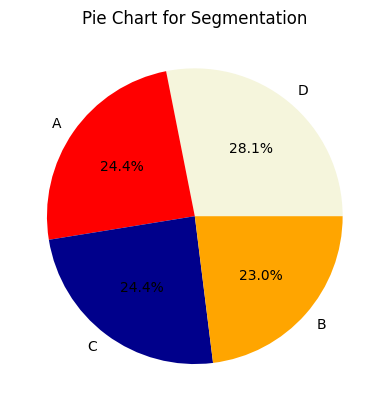

In [73]:
counts=df1["Segmentation"].value_counts()
label=["D","A","C","B"]
plt.pie(counts, labels=label, autopct='%1.1f%%', colors=["beige","RED", "DARKBLUE","ORANGE"])
plt.title("Pie Chart for Segmentation")
plt.show()

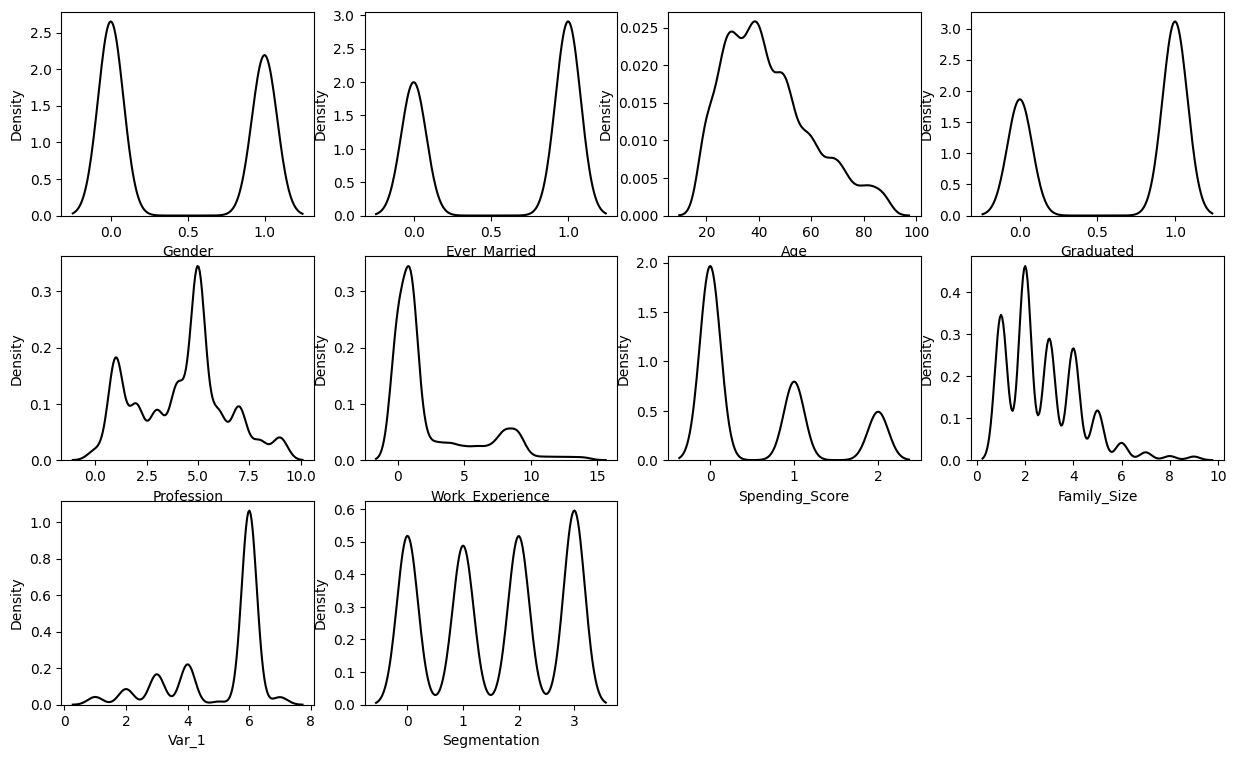

In [74]:
plt.figure(figsize=(15,9))
i=1
for col in df1.iloc[:,1:]:
    plt.subplot(3,4,i)
    sns.kdeplot(df1[col], color="black")
    i+=1

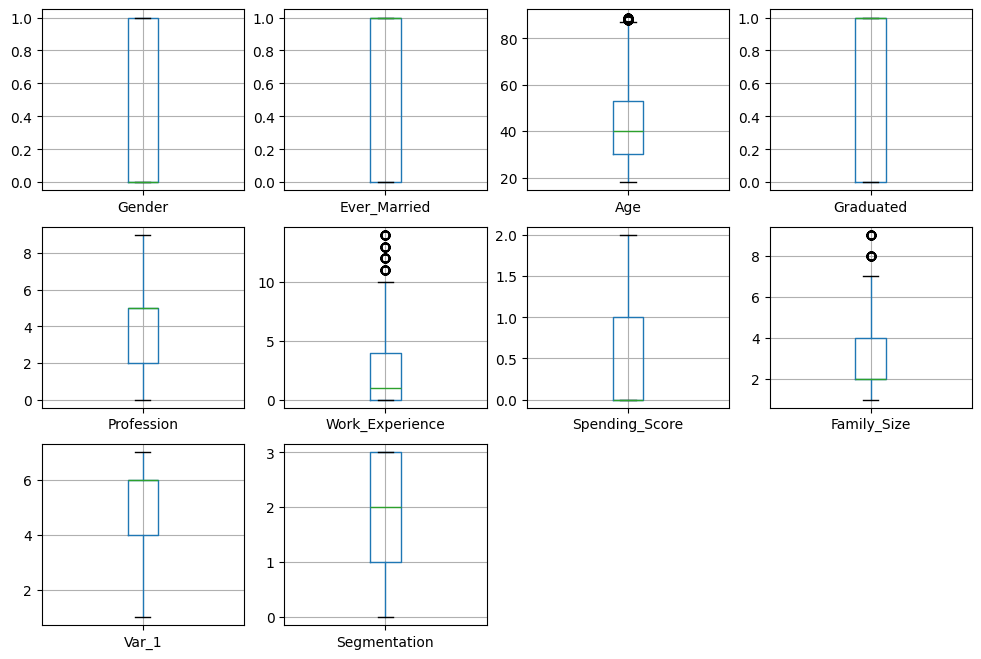

In [75]:
plt.figure(figsize=(12,8))
i=1
for col in df1.iloc[:,1:]:
    plt.subplot(3,4,i)
    df1[[col]].boxplot()
    i+=1

## Training the model

In [76]:
from sklearn.model_selection import train_test_split

In [77]:
df1.columns

Index(['ID', 'Gender', 'Ever_Married', 'Age', 'Graduated', 'Profession',
       'Work_Experience', 'Spending_Score', 'Family_Size', 'Var_1',
       'Segmentation'],
      dtype='object')

In [78]:
X_train, X_test, y_train, y_test = train_test_split(df1[['ID', 'Gender', 'Ever_Married', 'Age', 'Graduated', 'Profession',
       'Work_Experience', 'Spending_Score', 'Family_Size', 'Var_1',]],df1['Segmentation'],test_size=0.2)

In [79]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6454 entries, 8003 to 2846
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               6454 non-null   float64
 1   Gender           6454 non-null   float64
 2   Ever_Married     6454 non-null   float64
 3   Age              6454 non-null   float64
 4   Graduated        6454 non-null   float64
 5   Profession       6454 non-null   float64
 6   Work_Experience  6454 non-null   float64
 7   Spending_Score   6454 non-null   float64
 8   Family_Size      6454 non-null   float64
 9   Var_1            6454 non-null   float64
dtypes: float64(10)
memory usage: 554.6 KB


In [80]:
len(X_train)

6454

In [81]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1614 entries, 2528 to 3136
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               1614 non-null   float64
 1   Gender           1614 non-null   float64
 2   Ever_Married     1614 non-null   float64
 3   Age              1614 non-null   float64
 4   Graduated        1614 non-null   float64
 5   Profession       1614 non-null   float64
 6   Work_Experience  1614 non-null   float64
 7   Spending_Score   1614 non-null   float64
 8   Family_Size      1614 non-null   float64
 9   Var_1            1614 non-null   float64
dtypes: float64(10)
memory usage: 138.7 KB


In [82]:
y_train.info()

<class 'pandas.core.series.Series'>
Index: 6454 entries, 8003 to 2846
Series name: Segmentation
Non-Null Count  Dtype  
--------------  -----  
6454 non-null   float64
dtypes: float64(1)
memory usage: 100.8 KB


In [83]:
len(y_test)

1614

### Scale The Data

In [84]:
from sklearn.preprocessing import MinMaxScaler

In [85]:
scaler=MinMaxScaler()
X_trainscaled=scaler.fit_transform(X_train)
X_testscaled=scaler.fit_transform(X_test)

In [86]:
x_train = pd.DataFrame(X_trainscaled,columns=X_train.columns)
x_test= pd.DataFrame(X_testscaled,columns=X_test.columns)

In [87]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6454 entries, 0 to 6453
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               6454 non-null   float64
 1   Gender           6454 non-null   float64
 2   Ever_Married     6454 non-null   float64
 3   Age              6454 non-null   float64
 4   Graduated        6454 non-null   float64
 5   Profession       6454 non-null   float64
 6   Work_Experience  6454 non-null   float64
 7   Spending_Score   6454 non-null   float64
 8   Family_Size      6454 non-null   float64
 9   Var_1            6454 non-null   float64
dtypes: float64(10)
memory usage: 504.3 KB


In [88]:
x_test

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1
0,0.754893,0.0,0.0,0.478873,1.0,0.555556,0.071429,0.0,0.000,0.833333
1,0.916036,1.0,1.0,0.676056,0.0,0.333333,0.071429,1.0,0.125,0.833333
2,0.172264,1.0,0.0,0.239437,0.0,0.000000,0.000000,0.0,0.500,0.833333
3,0.820507,0.0,0.0,0.098592,0.0,0.111111,0.000000,0.0,0.250,0.500000
4,0.410142,0.0,1.0,1.000000,1.0,0.777778,0.071429,0.0,0.000,0.833333
...,...,...,...,...,...,...,...,...,...,...
1609,0.828514,0.0,0.0,0.338028,1.0,0.444444,0.071429,0.0,0.000,1.000000
1610,0.145129,0.0,1.0,0.492958,1.0,0.555556,0.000000,0.0,0.000,0.833333
1611,0.873443,1.0,0.0,0.338028,1.0,0.777778,0.000000,0.0,0.000,0.500000
1612,0.701512,0.0,1.0,0.394366,1.0,0.666667,0.071429,1.0,0.500,0.833333


In [89]:
x_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1614 entries, 0 to 1613
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               1614 non-null   float64
 1   Gender           1614 non-null   float64
 2   Ever_Married     1614 non-null   float64
 3   Age              1614 non-null   float64
 4   Graduated        1614 non-null   float64
 5   Profession       1614 non-null   float64
 6   Work_Experience  1614 non-null   float64
 7   Spending_Score   1614 non-null   float64
 8   Family_Size      1614 non-null   float64
 9   Var_1            1614 non-null   float64
dtypes: float64(10)
memory usage: 126.2 KB


In [90]:
y_train.info()

<class 'pandas.core.series.Series'>
Index: 6454 entries, 8003 to 2846
Series name: Segmentation
Non-Null Count  Dtype  
--------------  -----  
6454 non-null   float64
dtypes: float64(1)
memory usage: 100.8 KB


## Using Decision Tree

In [91]:
from sklearn.tree import DecisionTreeClassifier
import numpy as np

In [92]:
classifier=DecisionTreeClassifier(criterion='gini')

In [93]:
classifier.fit(x_train,y_train)

DecisionTreeClassifier()

In [94]:
classifier.predict(x_test)

array([0., 3., 0., ..., 0., 1., 1.])

In [95]:
row_data=x_test.iloc[1].to_numpy()

In [96]:
row_data

array([0.91603648, 1.        , 1.        , 0.67605634, 0.        ,
       0.33333333, 0.07142857, 1.        , 0.125     , 0.83333333])

In [97]:
# changing the input_data to numpy array
input_array = np.asarray(row_data)

# reshape the array as we are predicting for one instance
input = input_array.reshape(1,-1)

result=classifier.predict(input)
if result==0:
    print("Customer belongs to Segment A")
elif result==1:
    print("Customer belongs to Segment B")
elif result==2:
    print("Customer belongs to Segment C")
elif result==3:
    print("Customer belongs to Segment D")
else:
    print("check input")
    

Customer belongs to Segment D


C:\Users\91876\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [98]:
score_dt=classifier.score(x_test,y_test)

In [99]:
score_dt

0.44609665427509293

## Using Random Forest

In [100]:
from sklearn.ensemble import RandomForestClassifier

In [101]:
clf=RandomForestClassifier(n_estimators=100, criterion='gini')

In [102]:
clf.fit(x_train,y_train)

RandomForestClassifier()

In [103]:
clf.predict(x_test)

array([0., 3., 3., ..., 0., 2., 1.])

In [104]:
# changing the input_data to numpy array
input_array = np.asarray(row_data)

# reshape the array as we are predicting for one instance
input = input_array.reshape(1,-1)

result=clf.predict(input)
if result==0:
    print("Customer belongs to Segment A")
elif result==1:
    print("Customer belongs to Segment B")
elif result==2:
    print("Customer belongs to Segment C")
elif result==3:
    print("Customer belongs to Segment D")
else:
    print("check input")

Customer belongs to Segment D


C:\Users\91876\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [105]:
score_rf=clf.score(x_test,y_test)

In [106]:
score_rf

0.49876084262701365

In [107]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8068 entries, 0 to 8067
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               8068 non-null   float64
 1   Gender           8068 non-null   float64
 2   Ever_Married     8068 non-null   float64
 3   Age              8068 non-null   float64
 4   Graduated        8068 non-null   float64
 5   Profession       8068 non-null   float64
 6   Work_Experience  8068 non-null   float64
 7   Spending_Score   8068 non-null   float64
 8   Family_Size      8068 non-null   float64
 9   Var_1            8068 non-null   float64
 10  Segmentation     8068 non-null   float64
dtypes: float64(11)
memory usage: 693.5 KB


### K mean Clustering

In [108]:
from sklearn.cluster import KMeans

In [109]:
kmean = KMeans(n_clusters=4)
kmean.fit(x_train)

KMeans(n_clusters=4)

In [110]:
y_pred = kmean.predict(x_train)

In [111]:
y_pred

array([2, 2, 2, ..., 1, 3, 3])

In [112]:
y_pred[:100]

array([2, 2, 2, 3, 3, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 3, 3, 0, 2, 3, 1, 0,
       1, 0, 1, 1, 1, 0, 0, 1, 1, 3, 1, 3, 2, 0, 2, 1, 3, 2, 3, 3, 0, 1,
       1, 3, 3, 1, 2, 0, 0, 2, 1, 3, 3, 3, 3, 3, 2, 2, 3, 2, 3, 0, 2, 3,
       2, 0, 2, 0, 3, 0, 2, 1, 3, 1, 1, 1, 0, 0, 3, 3, 0, 1, 1, 1, 0, 1,
       0, 2, 0, 0, 1, 1, 1, 0, 3, 2, 3, 0])

In [113]:
y_train[:100].values

array([0., 3., 0., 2., 3., 3., 3., 3., 3., 1., 3., 2., 0., 3., 1., 1., 2.,
       2., 3., 2., 2., 0., 3., 3., 2., 3., 0., 1., 3., 0., 3., 2., 3., 2.,
       3., 3., 3., 2., 0., 2., 2., 0., 1., 2., 1., 3., 1., 1., 2., 0., 1.,
       3., 1., 2., 2., 1., 2., 2., 3., 1., 2., 3., 3., 3., 0., 1., 3., 3.,
       3., 1., 3., 0., 3., 2., 2., 3., 2., 2., 3., 1., 3., 0., 2., 2., 1.,
       1., 3., 2., 0., 2., 1., 2., 2., 1., 0., 3., 2., 1., 2., 3.])

In [114]:
inertia =kmean.inertia_

In [115]:
inertia

4317.955067709614

### Logistic Regression

In [116]:
from sklearn.linear_model import LogisticRegression

In [117]:
lr=LogisticRegression()

In [118]:
lr.fit(x_train,y_train)

LogisticRegression()

In [119]:
lr.predict(x_test)

array([0., 1., 3., ..., 0., 2., 2.])

In [120]:
# changing the input_data to numpy array
input_array = np.asarray(row_data)

# reshape the array as we are predicting for one instance
input = input_array.reshape(1,-1)

result=lr.predict(input)
if result==0:
    print("Customer belongs to Segment A")
elif result==1:
    print("Customer belongs to Segment B")
elif result==2:
    print("Customer belongs to Segment C")
elif result==3:
    print("Customer belongs to Segment D")
else:
    print("check input")

Customer belongs to Segment B


C:\Users\91876\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [121]:
score_lr=lr.score(x_test,y_test)

In [122]:
score_lr

0.4355638166047088

### Support Vector Machine

In [123]:
from sklearn.svm import SVC

In [124]:
svm = SVC()

In [125]:
svm.fit(x_train,y_train)

SVC()

In [126]:
svm.predict(x_test)

array([0., 1., 3., ..., 0., 2., 2.])

In [127]:
score_svm=svm.score(x_test,y_test)

In [128]:
score_svm

0.4882280049566295

### Score

In [129]:
print("the score of LinearRegression Algorithm is",score_lr )

the score of LinearRegression Algorithm is 0.4355638166047088


In [130]:
print("the score of DecisonTree Algorithm is",score_dt )

the score of DecisonTree Algorithm is 0.44609665427509293


In [131]:
print("the score of RandomForest Algorithm is",score_rf )

the score of RandomForest Algorithm is 0.49876084262701365


In [132]:
print("the score of Support Vector Machine Algorithm is",score_svm )

the score of Support Vector Machine Algorithm is 0.4882280049566295


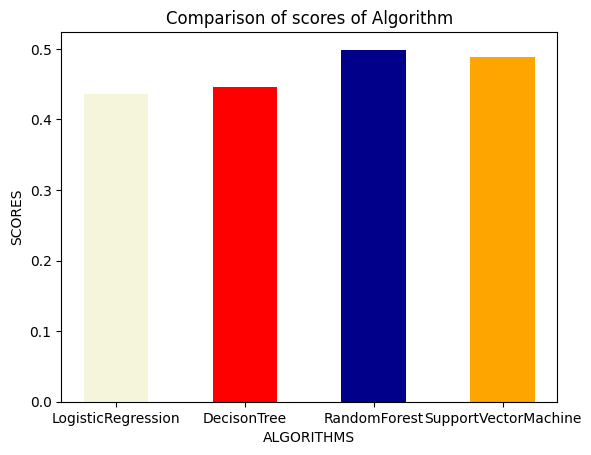

In [133]:
x=["LogisticRegression","DecisonTree","RandomForest", "SupportVectorMachine"]
y=[score_lr,score_dt,score_rf, score_svm]
plt.xlabel("ALGORITHMS")
plt.ylabel("SCORES")
plt.title("Comparison of scores of Algorithm")
col=["beige","RED", "DARKBLUE","ORANGE"]
plt.bar(x,y, width=0.5, color=col)
plt.show()